M. Varun Sankar

EE18BTECH11030


Question 2 

In [5]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import scipy.io as sp
import itertools

In [6]:
def thickSlab(n, X, Y):
  a = cp.Variable(n)
  b = cp.Variable()

  obj = cp.Minimize(cp.norm(a))
  constraints = [a@X - b >= 1, 
                 a@Y -b <= -1]
  prob = cp.Problem(obj, constraints)
  prob.solve()

  W_thick = 2.0/obj.value
  return W_thick

Thickness of slab:  116.42440493435046
The 10 features [0, 6, 7, 17, 18, 20, 22, 25, 26, 45] 

Width of the thickest slab
Before using features: 77.02461748084833
After Optimising: 78.46967629764835 



Text(0.5, 1.0, 'Thickness VS Cardinality')

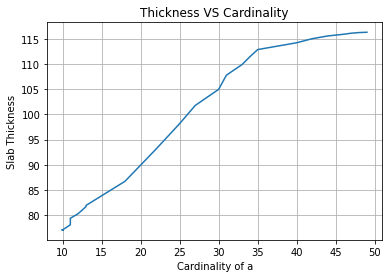

In [7]:
X = sp.loadmat('Xdata.mat')["X"]  ## Insert the Xdata
Y = sp.loadmat('Ydata.mat')["Y"]

n = 50
L = np.logspace(-2,5)
A = np.zeros([n,len(L)])

for i in range(len(L)):
  a = cp.Variable(n)
  b = cp.Variable()
  
  objective = cp.Minimize(cp.norm(a)+L[i]*cp.norm(a,1))
  constraints  = [a@X - b >= 1, 
                  a@Y - b <= -1]
  problem = cp.Problem(objective,constraints)
  problem.solve()
  
  A[:,i] = a.value
Width = 2.0/np.linalg.norm(A,axis=0)
cardinality = np.sum((np.abs(A) > 0.0001),axis=0)

indices = list(itertools.chain(*np.where(cardinality == 10)))
Width_before_Features = Width[indices[len(indices)-1]]
features = list(itertools.chain(*np.where(np.abs(A[:,indices[len(indices)-1]]) > 0.0001)))

a = cp.Variable(len(features))
b = cp.Variable()

objective = cp.Minimize(cp.norm(a))
constraints = [a @ X[features,:] - b >= 1 ,
               a @ Y[features,:] - b <= -1]
problem = cp.Problem(objective,constraints)
problem.solve()

Width_optimised = 2/objective.value
print("Thickness of slab: ",thickSlab(n, X, Y))
print("The 10 features", features, '\n')
print("Width of the thickest slab")
print("Before using features:", Width_before_Features)
print("After Optimising:", Width_optimised, '\n')

# Plotting 
plt.plot(cardinality,Width)
plt.grid()
plt.xlabel("Cardinality of a")
plt.ylabel("Slab Thickness")
plt.title("Thickness VS Cardinality")

Question 3 

In [8]:
P1 = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0]])
P2 = np.array([[1,0,0,0],[0,0,1,0],[0,-1,0,10]])
P3 = np.array([[1,1,1,-10],[-1,1,1,0],[-1,-1,1,10]])
P4 = np.array([[0,1,1,0],[0,-1,1,0],[-1,0,0,10]])

y1 = [0.98, 0.93]
y2 = [1.01, 1.01]
y3 = [0.95, 1.05]
y4 = [2.04, 0.00]

Lower = 0
Upper = 1
while Upper - Lower > 0.0001:
  x = cp.Variable(3)
  U1 = P1[:,0:3] * x + P1[:,3]
  U2 = P2[:,0:3] * x + P2[:,3]
  U3 = P3[:,0:3] * x + P3[:,3]
  U4 = P4[:,0:3] * x  + P4[:,3]
  
  Middle = (Upper + Lower)*(0.5)
  
  objective = cp.Minimize(0)
  constraint = [ cp.norm(U1[0:2] - U1[2] * y1) <= Middle * U1[2], 
                 cp.norm(U2[0:2] - U2[2] * y2) <= Middle * U2[2],
                 cp.norm(U3[0:2] - U3[2] * y3) <= Middle * U3[2],
                 cp.norm(U4[0:2] - U4[2] * y4) <= Middle * U4[2]]

  prob = cp.Problem(objective,constraint)
  prob.solve()

  if prob.value == 0:
    Ans = x
    Upper = Middle
  else :
    Lower = Middle

print("x:", Ans.value)
print("optimal value:",Upper)

x: [4.91286976 5.01665726 5.19803717]
optimal value: 0.04949951171875
